In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_original = 'predictions_data/df_original.pkl'
df_unique_author = 'predictions_data/df_unique_author.pkl'
df_normalized = 'predictions_data/df_normalized.pkl'

In [3]:
# select dataframe
df_path = df_normalized
df = pd.read_pickle(df_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 34865 to 813
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   auhtor_ID                    600 non-null    object
 1   post                         600 non-null    object
 2   birth_year                   600 non-null    int64 
 3   age                          600 non-null    int64 
 4   age_range                    600 non-null    int64 
 5   clean_post                   600 non-null    object
 6   num_characters               600 non-null    int64 
 7   num_special_symbols          600 non-null    int64 
 8   num_emojis                   600 non-null    int64 
 9   contraction_count            600 non-null    int64 
 10  num_contractions             600 non-null    int64 
 11  ridge_prediction             600 non-null    int64 
 12  forest_prediction            600 non-null    int64 
 13  nb_prediction                600 non

# Quantitative Evaluation

In [4]:
def quantative_analysis(df, predicted_feature):
    # Check overall accuracy
    accuracy = (df['age_range'] == df[predicted_feature]).mean()
    class_evaluation = {}
    unique_age_ranges = df['age_range'].unique()

    # Check precision, recall, and F1-score for each class and the averages
    for age_range in unique_age_ranges:
        filtered_df = df[df['age_range'] == age_range]
        TP = (filtered_df[predicted_feature] == age_range).sum()
        TN = ((filtered_df['age_range'] != age_range) & (filtered_df[predicted_feature] != age_range)).sum()
        FP = ((filtered_df['age_range'] != age_range) & (filtered_df[predicted_feature] == age_range)).sum()
        FN = (filtered_df['age_range']== age_range).sum() - TP
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_score = 2 * precision * recall / (precision + recall)
        class_evaluation[age_range] = [accuracy, precision, recall, f1_score]

    sum_acc, sum_prec, sum_rec, sum_f1 = 0, 0, 0, 0
    for age_range, scores in class_evaluation.items():
        print(f'Age range: {age_range}\n Accuracy: {scores[0]}\n Precision: {scores[1]}\n Recall: {scores[2]}\n F1-score: {scores[3]}\n')
        sum_acc += scores[0]
        sum_prec += scores[1]
        sum_rec += scores[2]
        sum_f1 += scores[3]

    avg_accuracy = sum_acc / len(class_evaluation)
    avg_precision = sum_prec / len(class_evaluation)
    avg_recall = sum_rec / len(class_evaluation)
    avg_f1_score = sum_f1 / len(class_evaluation)

    print(f"""Accuracy: {accuracy}
    Average precision: {avg_precision}
    Average recall: {avg_recall}
    Average F1-score: {avg_f1_score}""")
    return avg_accuracy, avg_precision, avg_recall, avg_f1_score

Age range: 2
 Accuracy: 0.04666666666666667
 Precision: 1.0
 Recall: 0.04666666666666667
 F1-score: 0.089171974522293

Age range: 3
 Accuracy: 0.9266666666666666
 Precision: 1.0
 Recall: 0.9266666666666666
 F1-score: 0.9619377162629758

Age range: 4
 Accuracy: 0.06
 Precision: 1.0
 Recall: 0.06
 F1-score: 0.11320754716981131

Age range: 5
 Accuracy: 0.0
 Precision: nan
 Recall: 0.0
 F1-score: nan

Accuracy: 0.0
    Average precision: nan
    Average recall: 0.2583333333333333
    Average F1-score: nan


C:\Users\zitag\AppData\Local\Temp\ipykernel_21080\668830438.py:15: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


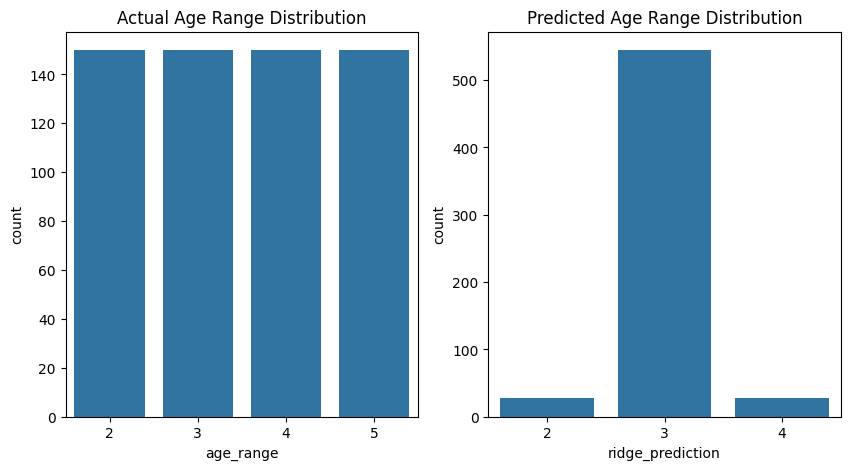

In [5]:
quantative_analysis(df, 'ridge_prediction')
# Plot both distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='age_range', data=df, ax=ax[0])
ax[0].set_title('Actual Age Range Distribution')
sns.countplot(x='ridge_prediction', data=df, ax=ax[1])
ax[1].set_title('Predicted Age Range Distribution')
plt.show()

Age range: 2
 Accuracy: 0.07333333333333333
 Precision: 1.0
 Recall: 0.07333333333333333
 F1-score: 0.13664596273291926

Age range: 3
 Accuracy: 0.7466666666666667
 Precision: 1.0
 Recall: 0.7466666666666667
 F1-score: 0.8549618320610688

Age range: 4
 Accuracy: 0.12
 Precision: 1.0
 Recall: 0.12
 F1-score: 0.21428571428571425

Age range: 5
 Accuracy: 0.0
 Precision: nan
 Recall: 0.0
 F1-score: nan

Accuracy: 0.0
    Average precision: nan
    Average recall: 0.23500000000000001
    Average F1-score: nan


C:\Users\zitag\AppData\Local\Temp\ipykernel_21080\668830438.py:15: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


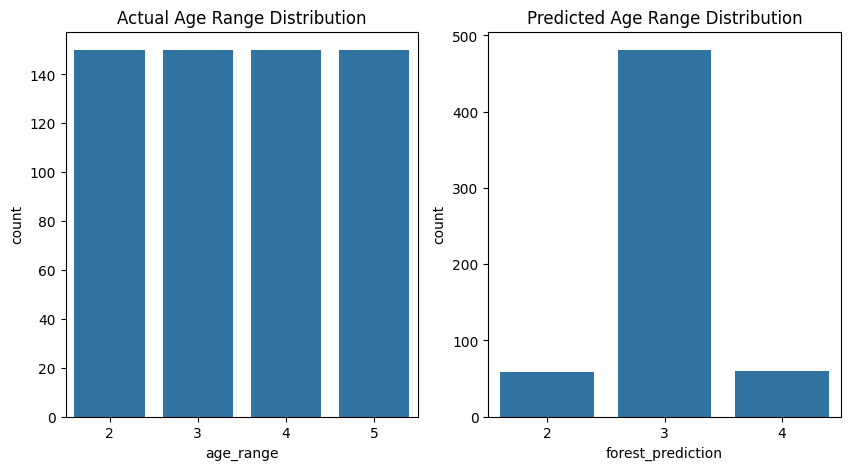

In [6]:
quantative_analysis(df, 'forest_prediction')
# Plot both distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='age_range', data=df, ax=ax[0])
ax[0].set_title('Actual Age Range Distribution')
sns.countplot(x='forest_prediction', data=df, ax=ax[1])
ax[1].set_title('Predicted Age Range Distribution')
plt.show()

Age range: 2
 Accuracy: 0.15333333333333332
 Precision: 1.0
 Recall: 0.15333333333333332
 F1-score: 0.2658959537572254

Age range: 3
 Accuracy: 0.1
 Precision: 1.0
 Recall: 0.1
 F1-score: 0.18181818181818182

Age range: 4
 Accuracy: 0.49333333333333335
 Precision: 1.0
 Recall: 0.49333333333333335
 F1-score: 0.6607142857142857

Age range: 5
 Accuracy: 0.3333333333333333
 Precision: 1.0
 Recall: 0.3333333333333333
 F1-score: 0.5

Accuracy: 0.3333333333333333
    Average precision: 1.0
    Average recall: 0.26999999999999996
    Average F1-score: 0.4021071053224232


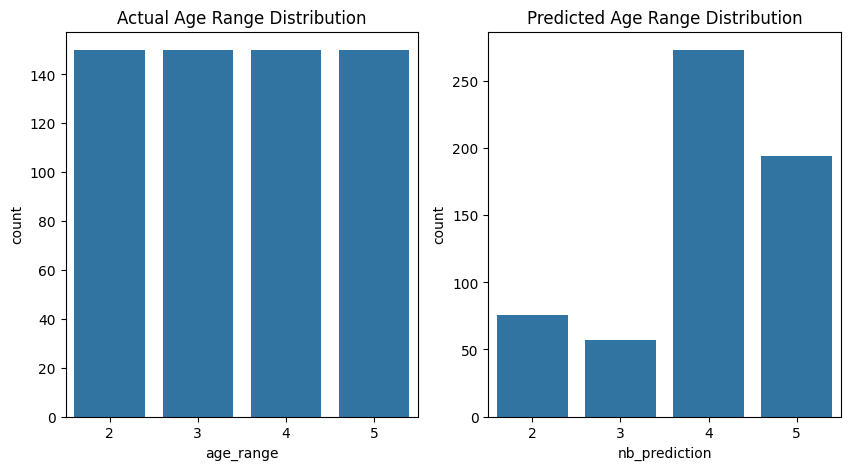

In [7]:
quantative_analysis(df, 'nb_prediction')
# Plot both distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='age_range', data=df, ax=ax[0])
ax[0].set_title('Actual Age Range Distribution')
sns.countplot(x='nb_prediction', data=df, ax=ax[1])
ax[1].set_title('Predicted Age Range Distribution')
plt.show()

Age range: 2
 Accuracy: 0.05333333333333334
 Precision: 1.0
 Recall: 0.05333333333333334
 F1-score: 0.10126582278481014

Age range: 3
 Accuracy: 0.84
 Precision: 1.0
 Recall: 0.84
 F1-score: 0.9130434782608696

Age range: 4
 Accuracy: 0.12666666666666668
 Precision: 1.0
 Recall: 0.12666666666666668
 F1-score: 0.22485207100591717

Age range: 5
 Accuracy: 0.006666666666666667
 Precision: 1.0
 Recall: 0.006666666666666667
 F1-score: 0.013245033112582783

Accuracy: 0.006666666666666667
    Average precision: 1.0
    Average recall: 0.25666666666666665
    Average F1-score: 0.313101601291045


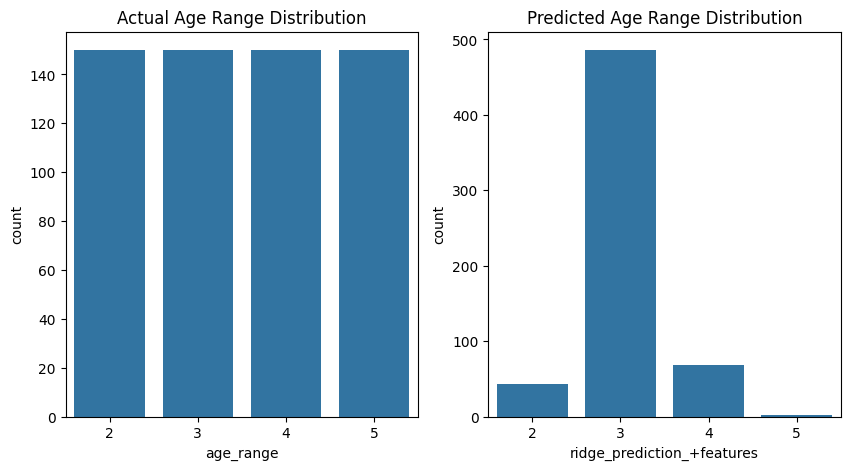

In [8]:
quantative_analysis(df, 'ridge_prediction_+features')
# Plot both distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='age_range', data=df, ax=ax[0])
ax[0].set_title('Actual Age Range Distribution')
sns.countplot(x='ridge_prediction_+features', data=df, ax=ax[1])
ax[1].set_title('Predicted Age Range Distribution')
plt.show()

Age range: 2
 Accuracy: 0.04
 Precision: 1.0
 Recall: 0.04
 F1-score: 0.07692307692307693

Age range: 3
 Accuracy: 0.86
 Precision: 1.0
 Recall: 0.86
 F1-score: 0.924731182795699

Age range: 4
 Accuracy: 0.10666666666666667
 Precision: 1.0
 Recall: 0.10666666666666667
 F1-score: 0.1927710843373494

Age range: 5
 Accuracy: 0.0
 Precision: nan
 Recall: 0.0
 F1-score: nan

Accuracy: 0.0
    Average precision: nan
    Average recall: 0.25166666666666665
    Average F1-score: nan


C:\Users\zitag\AppData\Local\Temp\ipykernel_21080\668830438.py:15: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


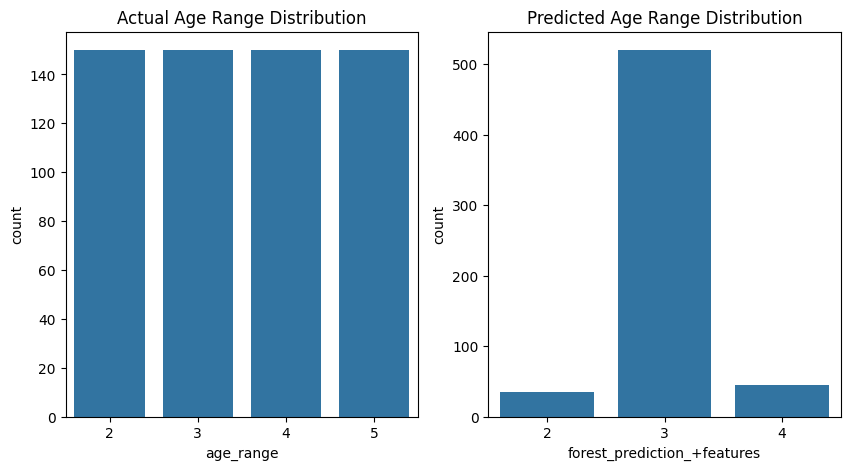

In [9]:
quantative_analysis(df, 'forest_prediction_+features')
# Plot both distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='age_range', data=df, ax=ax[0])
ax[0].set_title('Actual Age Range Distribution')
sns.countplot(x='forest_prediction_+features', data=df, ax=ax[1])
ax[1].set_title('Predicted Age Range Distribution')
plt.show()

Age range: 2
 Accuracy: 0.2
 Precision: 1.0
 Recall: 0.2
 F1-score: 0.33333333333333337

Age range: 3
 Accuracy: 0.12
 Precision: 1.0
 Recall: 0.12
 F1-score: 0.21428571428571425

Age range: 4
 Accuracy: 0.47333333333333333
 Precision: 1.0
 Recall: 0.47333333333333333
 F1-score: 0.6425339366515836

Age range: 5
 Accuracy: 0.32
 Precision: 1.0
 Recall: 0.32
 F1-score: 0.48484848484848486

Accuracy: 0.32
    Average precision: 1.0
    Average recall: 0.2783333333333333
    Average F1-score: 0.41875036727977905


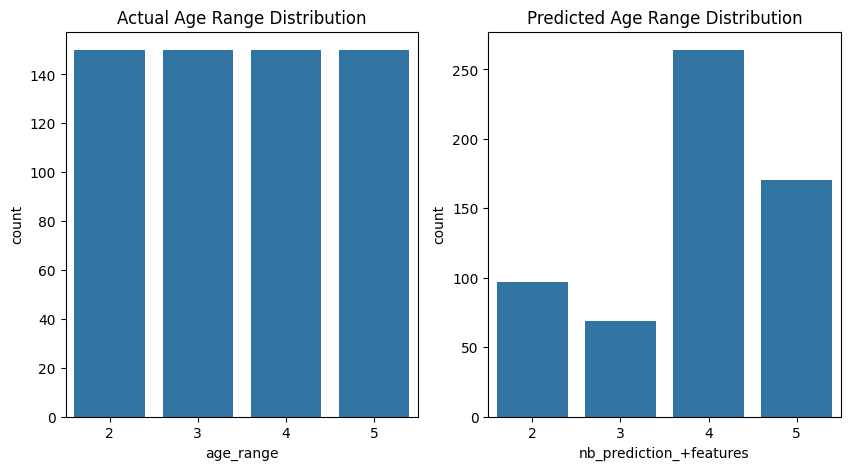

In [10]:
quantative_analysis(df, 'nb_prediction_+features')
# Plot both distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='age_range', data=df, ax=ax[0])
ax[0].set_title('Actual Age Range Distribution')
sns.countplot(x='nb_prediction_+features', data=df, ax=ax[1])
ax[1].set_title('Predicted Age Range Distribution')
plt.show()

## Non-cleaned vs. cleaned data: Paired T-test
Purpose: To determine if the predictions using the cleaned data are better that the predictions using the non-cleaned data.

Default statement: The predicitions of the non-cleaned data are not better that the predicitons of the cleaned data.

Parameter of interest: the accuracy of the predictions per class/label

H_0: accuracy uncleaned = accuracy cleaned

H_1: accuracy uncleaned < accuracy cleaned

Significance level: 0.05

In [11]:
# Paired t-test
from scipy.stats import ttest_rel
import numpy as np

# Example accuracies of each fold
accuracy_uncleaned = np.array([0.75, 0.80, 0.78, 0.82, 0.77]) 
accuracy_cleaned = np.array([0.72, 0.76, 0.75, 0.78, 0.74])

t_stat, p_value = ttest_rel(accuracy_uncleaned, accuracy_cleaned, alternative='less')

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check significance (alpha level = 0.05)
if p_value < 0.05:
    print("There is a significant difference in model performance after cleaning the data.")
else:
    print("There is no significant difference in model performance after cleaning the data.")


T-statistic: 13.880441875771412
P-value: 0.9999219041255462
There is no significant difference in model performance after cleaning the data.


# Qualitative Evaluation
Perform error analysis:

- Show examples of posts with explicit demographic mentions that were misclassified before cleaning but correctly classified after cleaning.

- Highlight cases where cleaning didn’t help or even worsened performance, and explain why that might have happened.

Provide visualizations:

- Include word clouds showing the most frequent words before and after cleaning to demonstrate the impact of data depollution on the text.

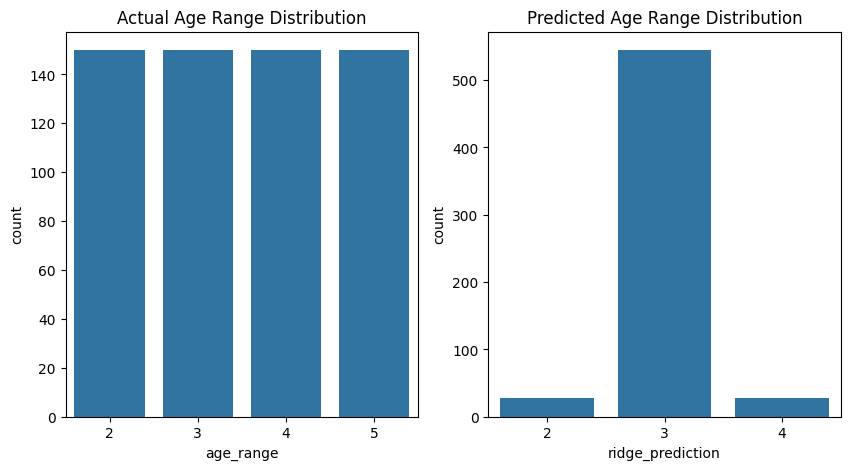

In [12]:
# Plot both distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='age_range', data=df, ax=ax[0])
ax[0].set_title('Actual Age Range Distribution')
sns.countplot(x='ridge_prediction', data=df, ax=ax[1])
ax[1].set_title('Predicted Age Range Distribution')
plt.show()

In [13]:
df

,auhtor_ID,post,birth_year,age,age_range,clean_post,num_characters,num_special_symbols,num_emojis,contraction_count,num_contractions,ridge_prediction,forest_prediction,nb_prediction,ridge_prediction_+features,forest_prediction_+features,nb_prediction_+features
34865,t2_3h3t0mb,record was 285 in May) **New States:** Illinoi...,1999,26,2,"['record', 'may', 'new', 'state', 'illinoi', '...",7985,424,1,41,41,3,3,4,3,3,4
38303,t2_ga9jkp22,Girly I am 20 with barely an a cup. I know it’...,2003,22,2,"['girli', 'bare', 'cup', 'know', 'difficult', ...",7864,213,11,30,30,3,3,3,3,3,4
36840,t2_8g3ecofl,"food you like in a single day, you're allowed ...",2001,24,2,"['food', 'like', 'singl', 'day', 'allow', 'tak...",2183,97,10,11,11,3,3,5,4,4,5
35322,t2_txn1p,so frustrating! Right. I am just frustrated th...,1999,26,2,"['frustrat', 'right', 'frustrat', 'thing', 'li...",3929,142,0,17,17,3,3,4,3,3,3
33673,t2_46463x14,"and smelly. shower? i’ll eat in the shower, ge...",1998,27,2,"['smelli', 'shower', 'eat', 'shower', 'get', '...",7819,235,1,35,35,3,2,4,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,t2_876fj9j5,get to know the locals I am sure they will tak...,1966,59,5,"['get', 'know', 'local', 'sure', 'take', 'wing...",7943,168,0,28,28,3,3,4,3,2,4
3296,t2_117xps,should not be given any benefit of doubt as to...,1975,50,5,"['given', 'benefit', 'doubt', 'claim', 'son', ...",8226,202,0,35,35,3,3,5,3,4,5
2408,t2_mlaku,Not being able to get them will lead to.... pi...,1973,52,5,"['abl', 'get', 'lead', 'piraci', 'feel', 'like...",8148,190,0,15,15,3,4,5,3,3,5
1199,t2_13uvgx,"Oh wow, I’ve worn many bottles of that stinky ...",1970,55,5,"['oh', 'wow', 'worn', 'mani', 'bottl', 'stinki...",7999,252,0,30,30,3,3,4,3,3,4
